Name: Beyza Akdeniz

ID: 201101017

Course: BIL570 /BIL470

# Bilim Kurgu Kitapları Tema Tahmini

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import ast
import re

import nltk
from nltk.corpus import stopwords 
import gensim 
from gensim.utils import simple_preprocess 

from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

# EDA

Loading subgenres

In [2]:
aliens_df = pd.read_csv('~/Desktop/YAP470/proje/sf_aliens.csv')
alternate_history_df = pd.read_csv('~/Desktop/YAP470/proje/sf_alternate_history.csv')
alternate_universe_df = pd.read_csv('~/Desktop/YAP470/proje/sf_alternate_universe.csv')
apocalyptic_df = pd.read_csv('~/Desktop/YAP470/proje/sf_apocalyptic.csv')
cyberpunk_df = pd.read_csv('~/Desktop/YAP470/proje/sf_cyberpunk.csv')
dystopia_df = pd.read_csv('~/Desktop/YAP470/proje/sf_dystopia.csv')
hard_sf_df = pd.read_csv('~/Desktop/YAP470/proje/sf_hard.csv')
military_sf_df = pd.read_csv('~/Desktop/YAP470/proje/sf_military.csv')
robots_df = pd.read_csv('~/Desktop/YAP470/proje/sf_robots.csv')
space_opera_df = pd.read_csv('~/Desktop/YAP470/proje/sf_space_opera.csv')
steampunk_df = pd.read_csv('~/Desktop/YAP470/proje/sf_steampunk.csv')
time_travel_df = pd.read_csv('~/Desktop/YAP470/proje/sf_time_travel.csv')

In [3]:
sf_tag = ['Science Fiction (Dystopia) ',
         'Science Fiction (Time Travel) ',
         'Science Fiction (Cyberpunk) ',
         'Science Fiction (Robots) ',
         'Science Fiction (Aliens) ',
         'Science Fiction (Apocalyptic) ',
         'Science Fiction (Alternate History) ',
         'Science Fiction (Hard Science Fiction) ',
         'Science Fiction (Steampunk) ',
         'Science Fiction (Military Science Fiction) ',
         'Space (Space Opera) ']

In [4]:
#for Apocalyptic
sf_tag2 = ['Science Fiction (Dystopia) ',
 'Science Fiction (Time Travel) ',
 'Science Fiction (Cyberpunk) ',
 'Science Fiction (Robots) ',
 'Science Fiction (Aliens) ',
 'Science Fiction (Apocalyptic) ',
 'Science Fiction (Alternate History) ',
 'Science Fiction (Steampunk) ',
 'Space (Space Opera) ']

In [5]:
#for Dystopia and Steampunk
sf_tag3 = ['Science Fiction (Dystopia) ',
 'Science Fiction (Time Travel) ',
 'Science Fiction (Cyberpunk) ',
 'Science Fiction (Robots) ',
 'Science Fiction (Aliens) ',
 'Science Fiction (Apocalyptic) ',
 'Science Fiction (Alternate History) ',
 'Science Fiction (Steampunk) ',
 'Space (Space Opera) ']

In [6]:
#for Time Travel
sf_tag4 = ['Science Fiction (Dystopia) ',
         'Science Fiction (Time Travel) ',
         'Science Fiction (Cyberpunk) ',
         'Science Fiction (Aliens) ',
         'Science Fiction (Apocalyptic) ',
         'Science Fiction (Alternate History) ',
         'Science Fiction (Hard Science Fiction) ',
         'Science Fiction (Steampunk) ',
         'Science Fiction (Military Science Fiction) ',
         'Space (Space Opera) ']

In [7]:
#for None
sf_tag5 = ['Science Fiction (Dystopia) ',
 'Science Fiction (Time Travel) ',
 'Science Fiction (Cyberpunk) ',
 'Science Fiction (Robots) ',
 'Science Fiction (Aliens) ',
 'Science Fiction (Apocalyptic) ',
 'Science Fiction (Alternate History) ',
 'Science Fiction (Hard Science Fiction) ',
 'Science Fiction (Steampunk) ',
 'Science Fiction (Military Science Fiction) ',
 'Space (Space Opera) ',
               'None']

Function to get "Genres" column of a dataset and turn into a binary

In [8]:
def genres_to_binary(dataframe, tags):

    genres_list = []
    
    for data in dataframe['Genres']:
        genres_list.append(ast.literal_eval(data))
        
    genres_df = pd.DataFrame(genres_list).fillna(0)

    genres_df = genres_df[tags]
    
    for column in genres_df.columns:
        genres_df[column] = genres_df[column].apply(lambda x: 0 if x <= 5 else 1)

    return genres_df

# Distribution of Subgenres

In [9]:
def plot_subgenres(subgenre_df, title, tags):
    subgenre_binary = genres_to_binary(subgenre_df, tags)
    genre_counts = subgenre_binary.sum(axis=0)

    plt.figure(figsize=(16, 8))
    plt.bar(genre_counts.index, genre_counts.values)
    plt.xticks(rotation=90)
    plt.xlabel('Genres')
    plt.ylabel('Counts')
    plt.title(f'Distribution of Subgenres in {title} Dataset')
    plt.show()

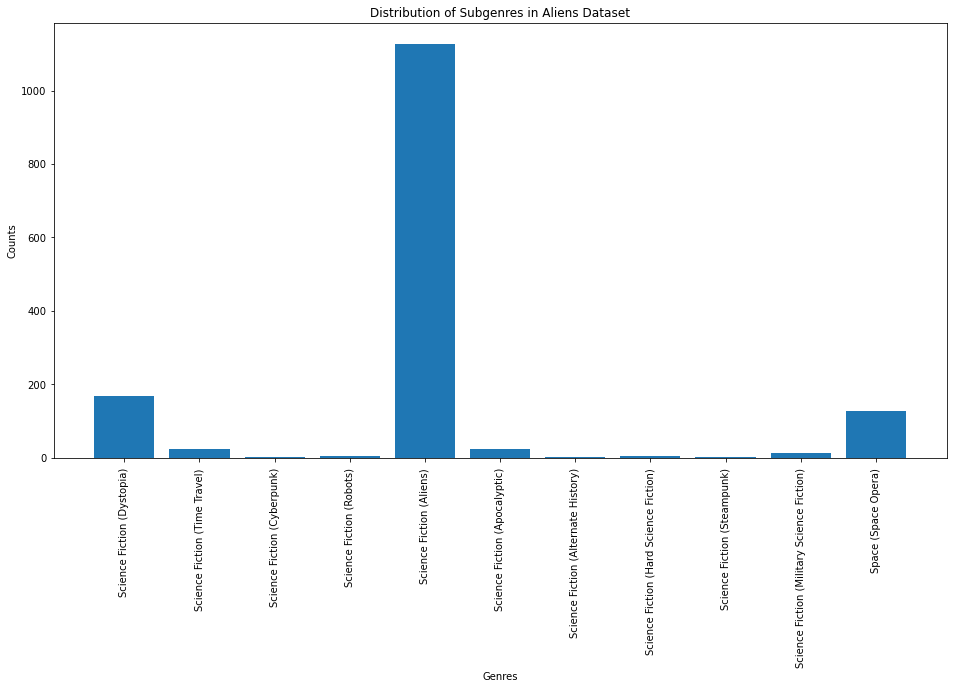

In [10]:
plot_subgenres(aliens_df, "Aliens", sf_tag)

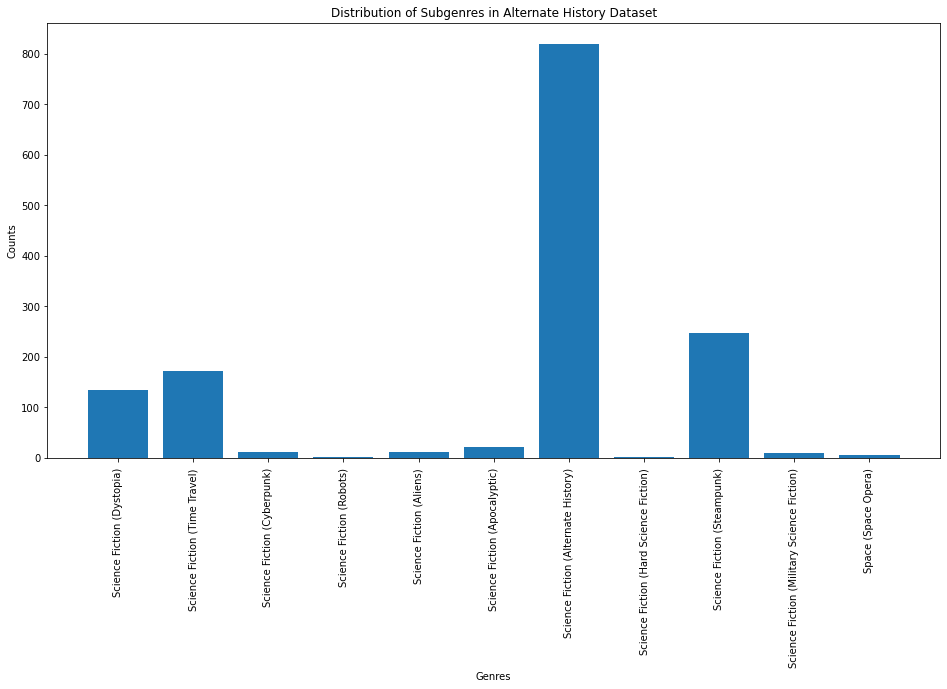

In [11]:
plot_subgenres(alternate_history_df, "Alternate History", sf_tag)

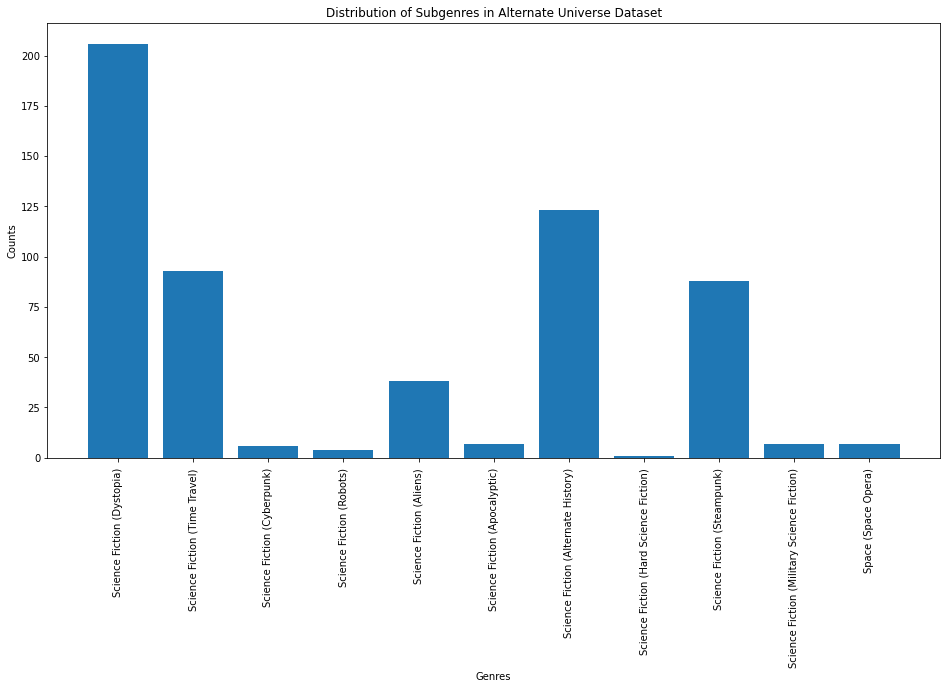

In [12]:
plot_subgenres(alternate_universe_df, "Alternate Universe", sf_tag)

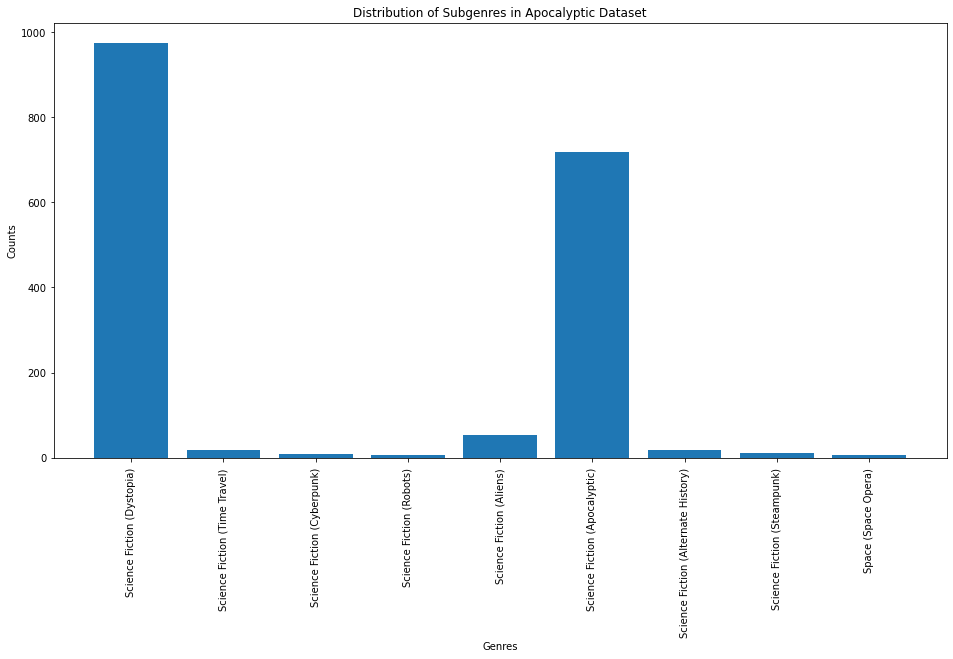

In [13]:
plot_subgenres(apocalyptic_df, "Apocalyptic", sf_tag2)

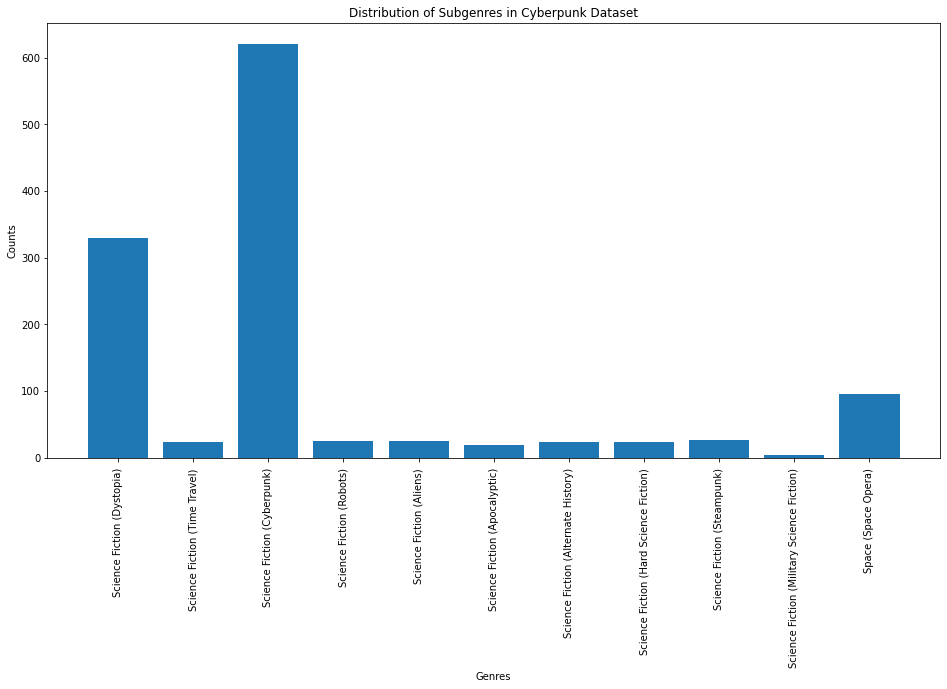

In [14]:
plot_subgenres(cyberpunk_df, "Cyberpunk", sf_tag)

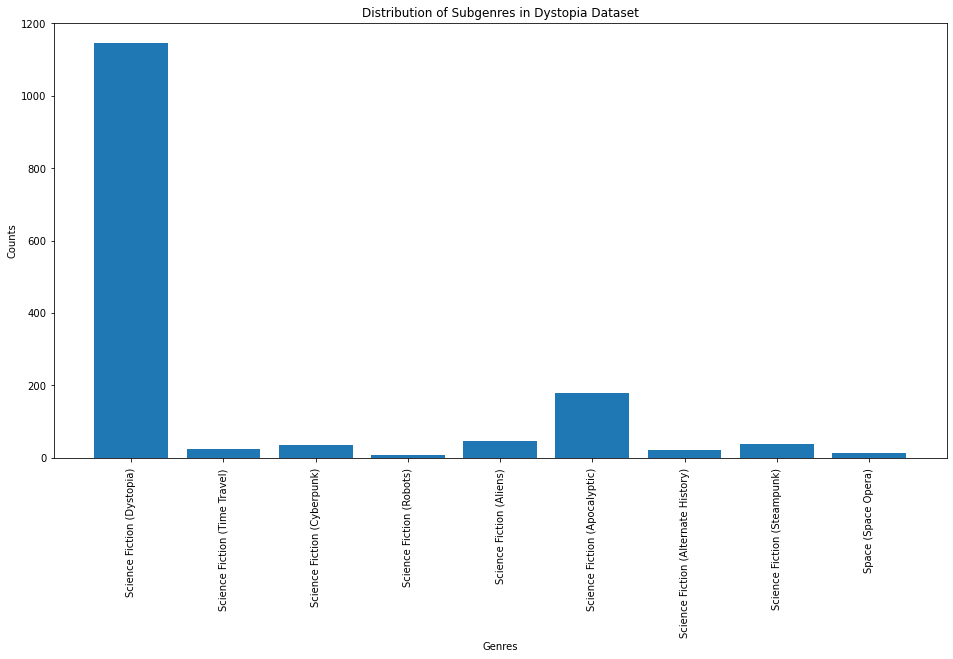

In [15]:
plot_subgenres(dystopia_df, "Dystopia", sf_tag3)

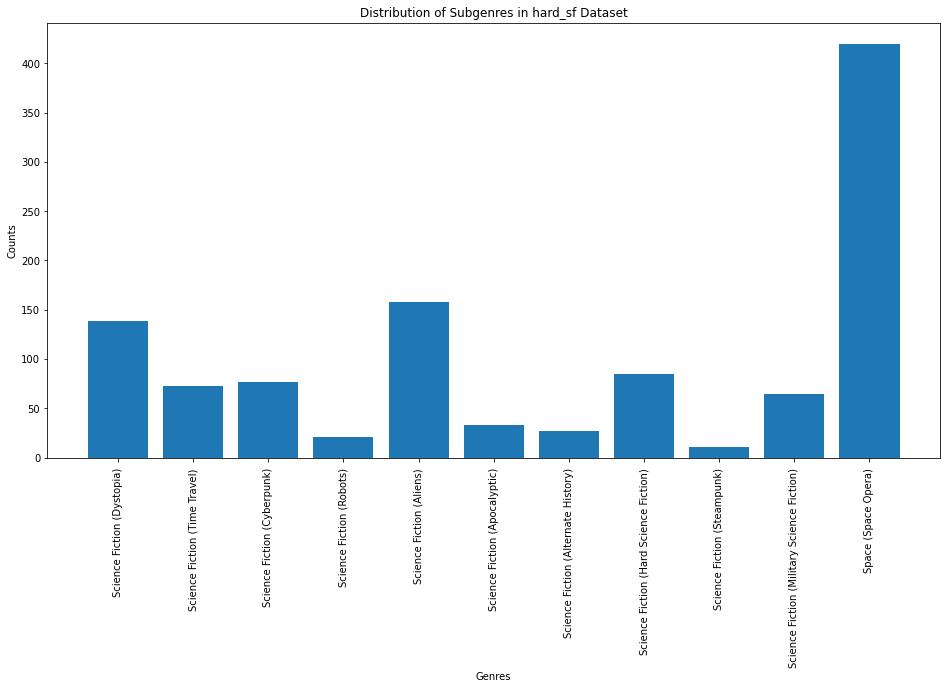

In [16]:
plot_subgenres(hard_sf_df, "hard_sf", sf_tag)

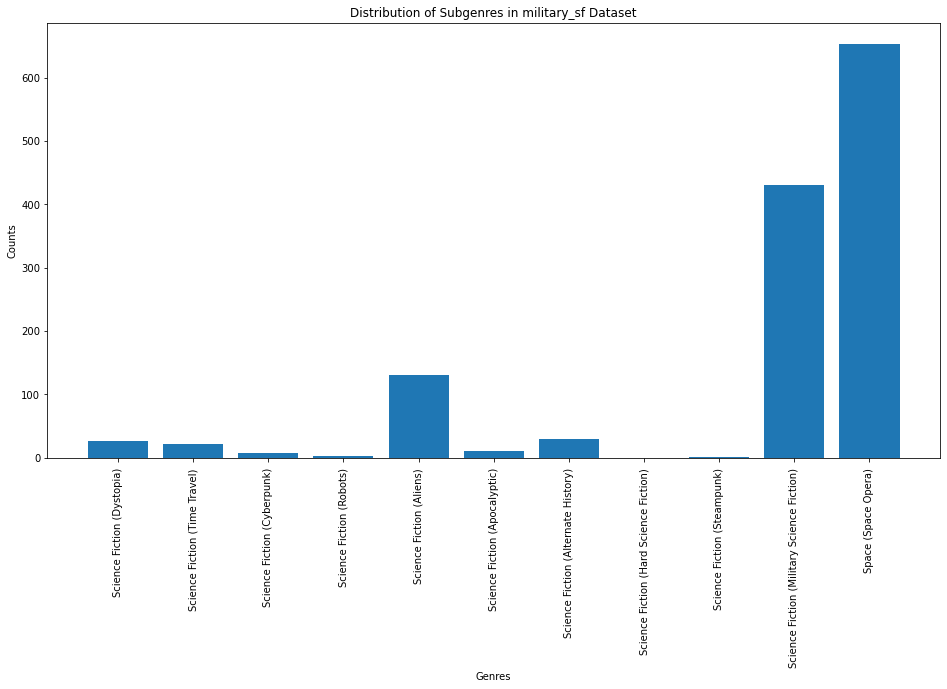

In [17]:
plot_subgenres(military_sf_df, "military_sf", sf_tag)

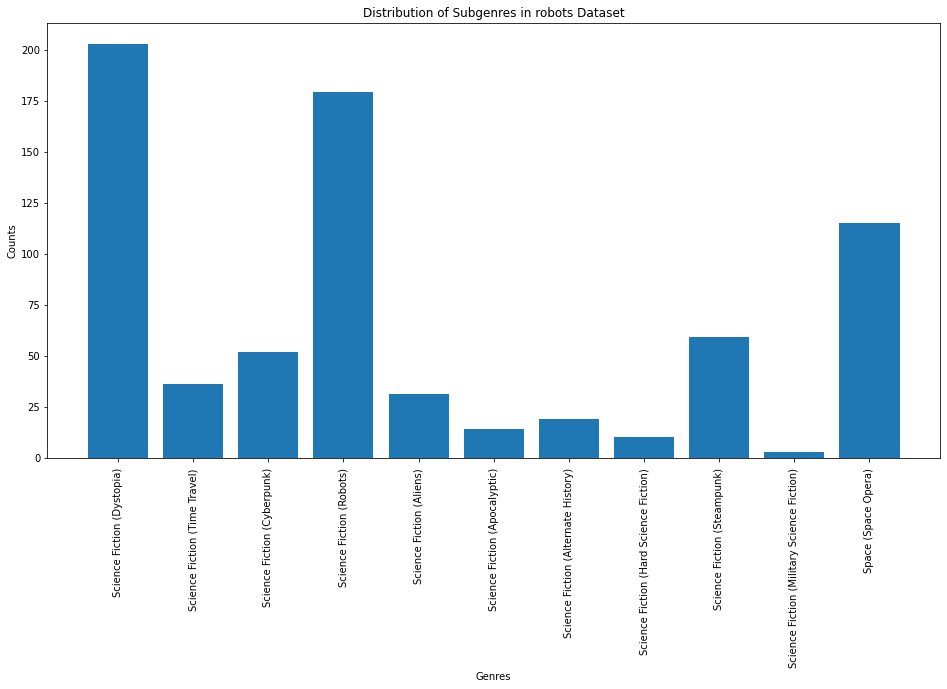

In [18]:
plot_subgenres(robots_df, "robots", sf_tag)

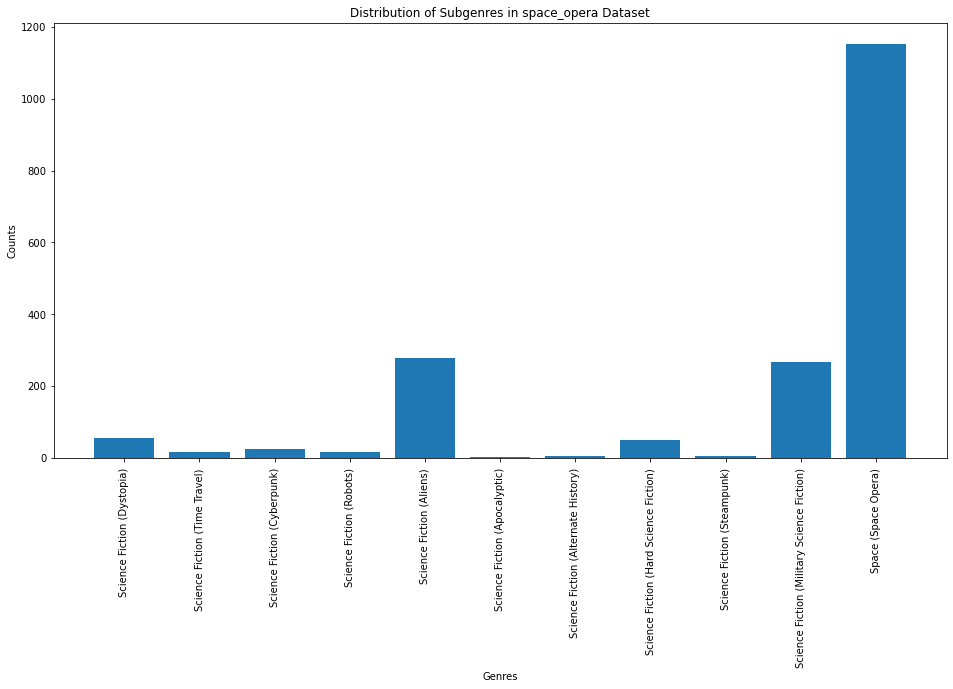

In [19]:
plot_subgenres(space_opera_df, "space_opera", sf_tag)

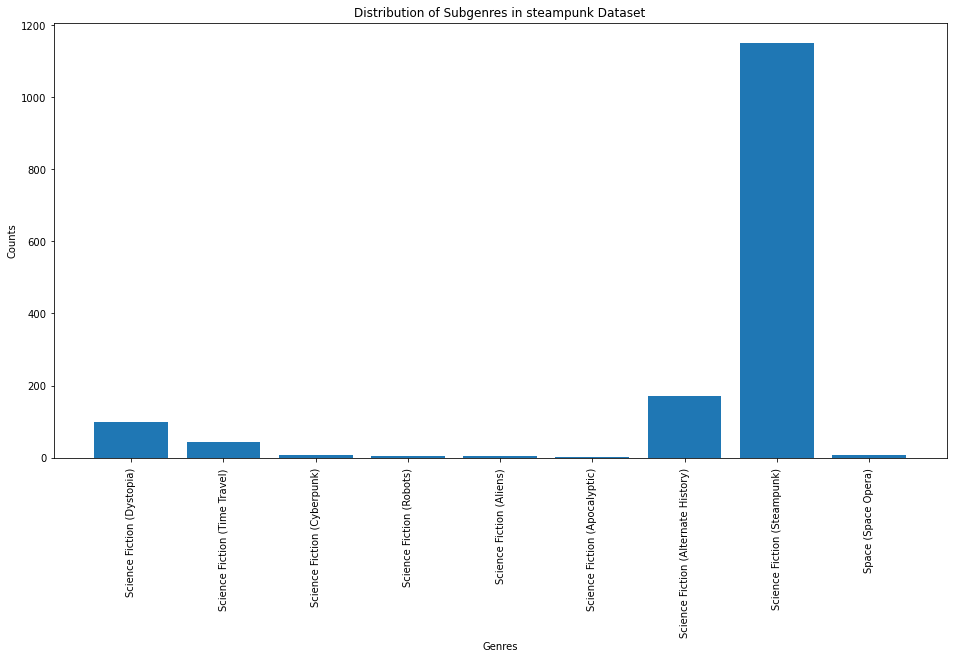

In [20]:
plot_subgenres(steampunk_df, "steampunk", sf_tag3)

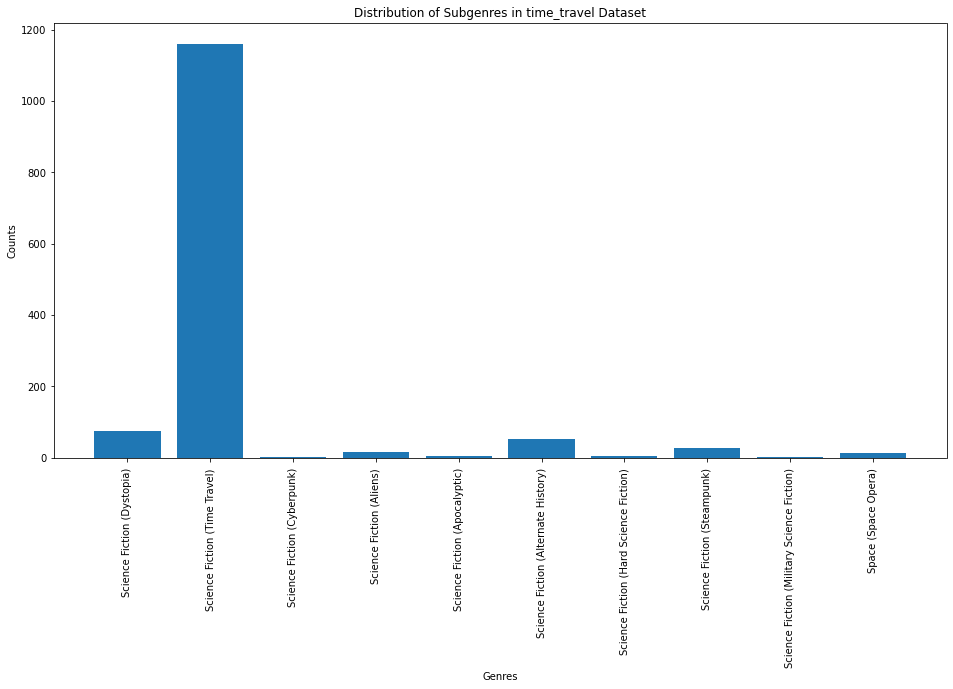

In [21]:
plot_subgenres(time_travel_df, "time_travel", sf_tag4)

# Conclusion of EDA

## Özgün türler

Bunlar teması özgün ve belirgin olan türlerdir ve diğer türlerden ayrışarak başlı başına bir türü ifade eder.

Aliens, 
Alternate History,
Apocalyptic,
Cyberpunk,
Dystopia,
Military SF,
Robots,
Space,
Steampunk,
Time Travel 

## Özgün olmayan türler

BUnlar diğer türlerin karışımı olan türlerdir. 

Alternate Universe: Özellikle Dystopia, Alternate History, Steampunk ve Time Travel türlerinin bir bileşimidir.

Hard SF: Neredeyse tüm diğer türlerle kesişimi vardır ve özellikle Space Opera ile eşleştirilmiştir.

# Clean Dataset

In [22]:
#Keep pnly distinctive subgenres
sf_cols = ['Science Fiction (Dystopia) ',
         'Science Fiction (Time Travel) ',
         'Science Fiction (Cyberpunk) ',
         'Science Fiction (Robots) ',
         'Science Fiction (Aliens) ',
         'Science Fiction (Apocalyptic) ',
         'Science Fiction (Alternate History) ',
         'Science Fiction (Steampunk) ',
         'Science Fiction (Military Science Fiction) ',
         'Space (Space Opera) ',
          'None']

In [23]:
#All dataframes in one
distinctive_subgenres = [aliens_df, alternate_history_df, apocalyptic_df, cyberpunk_df, dystopia_df, military_sf_df, robots_df, space_opera_df, steampunk_df, time_travel_df]
merged_sf_df = pd.concat(distinctive_subgenres)

#Drop duplicates according to url
merged_sf_df = merged_sf_df.drop_duplicates(subset='url', keep='first').copy()
merged_sf_df = merged_sf_df.reset_index().drop('index', axis=1)
merged_sf_df

,Book_Title,Original_Book_Title,Author_Name,Edition_Language,Rating_score,Rating_votes,Review_number,Book_Description,Year_published,Genres,url
0,Obsidian,Obsidian,Jennifer L. Armentrout,English,4.17,236780,18161,Starting over sucks.When we moved to West Virg...,2011,"{'Young Adult': 3439, 'Fantasy (Paranormal) ':...",https://www.goodreads.com/book/show/12578077-o...
1,Onyx,Onyx,Jennifer L. Armentrout,English,4.27,153429,10497,BEING CONNECTED TO DAEMON BLACK SUCKS… Thanks ...,2012,"{'Young Adult': 2271, 'Fantasy (Paranormal) ':...",https://www.goodreads.com/book/show/13047090-onyx
2,The 5th Wave,The 5th Wave,Rick Yancey,English,4.03,400600,29990,"After the 1st wave, only darkness remains. Aft...",2013,"{'Young Adult': 5436, 'Science Fiction': 3327,...",https://www.goodreads.com/book/show/16101128-t...
3,The Host,The Host,Stephenie Meyer,English,3.84,915026,41673,Melanie Stryder refuses to fade away. The eart...,2008,"{'Young Adult': 4529, 'Science Fiction': 4285,...",https://www.goodreads.com/book/show/1656001.Th...
4,Opal,Opal,Jennifer L. Armentrout,None,4.27,129006,9463,No one is like Daemon Black.When he set out to...,2012,"{'Young Adult': 1855, 'Fantasy (Paranormal) ':...",https://www.goodreads.com/book/show/13362536-opal
...,...,...,...,...,...,...,...,...,...,...,...
9841,Always Mine,Always Mine (The Blackthorn Trilogy #1),Sophia Johnson,English,3.55,276,27,The great Lord Damron is no more than a shadow...,2006,"{'Romance (Historical Romance) ': 26, 'Science...",https://www.goodreads.com/book/show/524577.Alw...
9842,Hour of the Olympics,"Hour of the Olympics (Magic Tree House, #16)",Mary Pope Osborne,English,3.94,8710,284,The #1 bestselling chapter book series of all ...,1998,"{'Fantasy': 115, 'Childrens': 114, 'Fiction': ...",https://www.goodreads.com/book/show/181401.Hou...
9843,Tumbling Through Time,Tumbling Through Time,Gwyn Cready,English,3.34,312,51,"In her sparkling and hilarious debut, author G...",2000,"{'Romance': 28, 'Science Fiction (Time Travel)...",https://www.goodreads.com/book/show/1888734.Tu...
9844,Time's Arrow,Time’s Arrow,Martin Amis,English,3.71,14934,1106,In Time's Arrow the doctor Tod T. Friendly die...,1991,"{'Fiction': 586, 'Historical (Historical Ficti...",https://www.goodreads.com/book/show/23031.Time...


Function to get subgenres from merged dataset

In [24]:
def get_subgenre(dataframe):
    
    genres_list = []
    
    for data in dataframe['Genres']:
        genres_list.append(ast.literal_eval(data))
        
    subgenres_dataframe = pd.DataFrame(genres_list).fillna(0)
    subgenres_dataframe = subgenres_dataframe[sf_tag].copy()
    
    df_cols = list(subgenres_dataframe.columns)
    for i in df_cols:
        subgenres_dataframe.loc[subgenres_dataframe[i] <= 5, i] = 0
        subgenres_dataframe.loc[subgenres_dataframe[i] > 5, i] = 1
    
    return subgenres_dataframe

<AxesSubplot:>

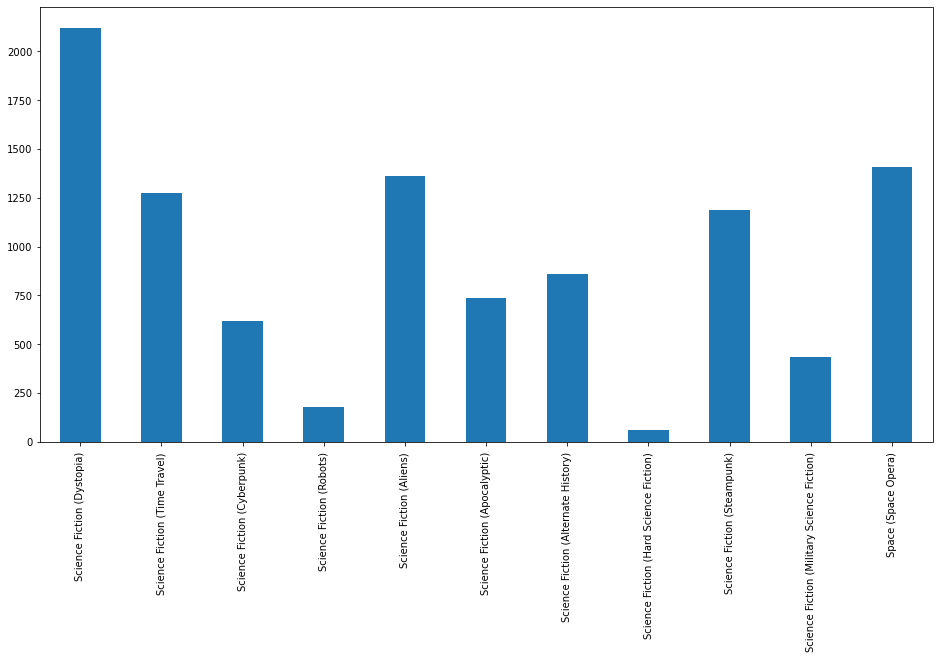

In [25]:
subgenres_dataframe = get_subgenre(merged_sf_df)

plt.figure(figsize=(16,8))
subgenres_dataframe.sum(axis=0).plot.bar()

In [26]:
merged_sf_df = pd.concat([merged_sf_df, subgenres_dataframe], axis=1)
merged_sf_df

,Book_Title,Original_Book_Title,Author_Name,Edition_Language,Rating_score,Rating_votes,Review_number,Book_Description,Year_published,Genres,...,Science Fiction (Time Travel),Science Fiction (Cyberpunk),Science Fiction (Robots),Science Fiction (Aliens),Science Fiction (Apocalyptic),Science Fiction (Alternate History),Science Fiction (Hard Science Fiction),Science Fiction (Steampunk),Science Fiction (Military Science Fiction),Space (Space Opera)
0,Obsidian,Obsidian,Jennifer L. Armentrout,English,4.17,236780,18161,Starting over sucks.When we moved to West Virg...,2011,"{'Young Adult': 3439, 'Fantasy (Paranormal) ':...",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Onyx,Onyx,Jennifer L. Armentrout,English,4.27,153429,10497,BEING CONNECTED TO DAEMON BLACK SUCKS… Thanks ...,2012,"{'Young Adult': 2271, 'Fantasy (Paranormal) ':...",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,The 5th Wave,The 5th Wave,Rick Yancey,English,4.03,400600,29990,"After the 1st wave, only darkness remains. Aft...",2013,"{'Young Adult': 5436, 'Science Fiction': 3327,...",...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,The Host,The Host,Stephenie Meyer,English,3.84,915026,41673,Melanie Stryder refuses to fade away. The eart...,2008,"{'Young Adult': 4529, 'Science Fiction': 4285,...",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Opal,Opal,Jennifer L. Armentrout,None,4.27,129006,9463,No one is like Daemon Black.When he set out to...,2012,"{'Young Adult': 1855, 'Fantasy (Paranormal) ':...",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9841,Always Mine,Always Mine (The Blackthorn Trilogy #1),Sophia Johnson,English,3.55,276,27,The great Lord Damron is no more than a shadow...,2006,"{'Romance (Historical Romance) ': 26, 'Science...",...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9842,Hour of the Olympics,"Hour of the Olympics (Magic Tree House, #16)",Mary Pope Osborne,English,3.94,8710,284,The #1 bestselling chapter book series of all ...,1998,"{'Fantasy': 115, 'Childrens': 114, 'Fiction': ...",...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9843,Tumbling Through Time,Tumbling Through Time,Gwyn Cready,English,3.34,312,51,"In her sparkling and hilarious debut, author G...",2000,"{'Romance': 28, 'Science Fiction (Time Travel)...",...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9844,Time's Arrow,Time’s Arrow,Martin Amis,English,3.71,14934,1106,In Time's Arrow the doctor Tod T. Friendly die...,1991,"{'Fiction': 586, 'Historical (Historical Ficti...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Preprocessing Stage

In [27]:
#Drop no genres books 
merged_sf_df = merged_sf_df[merged_sf_df[sf_tag].sum(axis=1) > 0]
merged_sf_df = merged_sf_df.reset_index()

In [28]:
#Find NaN values
missing_values = merged_sf_df.isna().sum()
missing_values

index                                           0
Book_Title                                      0
Original_Book_Title                             0
Author_Name                                     0
Edition_Language                               20
Rating_score                                    0
Rating_votes                                    0
Review_number                                   0
Book_Description                               15
Year_published                                  0
Genres                                          0
url                                             0
Science Fiction (Dystopia)                      0
Science Fiction (Time Travel)                   0
Science Fiction (Cyberpunk)                     0
Science Fiction (Robots)                        0
Science Fiction (Aliens)                        0
Science Fiction (Apocalyptic)                   0
Science Fiction (Alternate History)             0
Science Fiction (Hard Science Fiction)          0


In [29]:
merged_sf_df

,index,Book_Title,Original_Book_Title,Author_Name,Edition_Language,Rating_score,Rating_votes,Review_number,Book_Description,Year_published,...,Science Fiction (Time Travel),Science Fiction (Cyberpunk),Science Fiction (Robots),Science Fiction (Aliens),Science Fiction (Apocalyptic),Science Fiction (Alternate History),Science Fiction (Hard Science Fiction),Science Fiction (Steampunk),Science Fiction (Military Science Fiction),Space (Space Opera)
0,0,Obsidian,Obsidian,Jennifer L. Armentrout,English,4.17,236780,18161,Starting over sucks.When we moved to West Virg...,2011,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Onyx,Onyx,Jennifer L. Armentrout,English,4.27,153429,10497,BEING CONNECTED TO DAEMON BLACK SUCKS… Thanks ...,2012,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,The 5th Wave,The 5th Wave,Rick Yancey,English,4.03,400600,29990,"After the 1st wave, only darkness remains. Aft...",2013,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,The Host,The Host,Stephenie Meyer,English,3.84,915026,41673,Melanie Stryder refuses to fade away. The eart...,2008,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Opal,Opal,Jennifer L. Armentrout,None,4.27,129006,9463,No one is like Daemon Black.When he set out to...,2012,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7925,9840,My Timeswept Heart,My Timeswept Heart,Amy J. Fetzer,English,4.11,179,12,In this 1992 Golden Heart Finalist for Best Ti...,1993,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7926,9841,Always Mine,Always Mine (The Blackthorn Trilogy #1),Sophia Johnson,English,3.55,276,27,The great Lord Damron is no more than a shadow...,2006,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7927,9842,Hour of the Olympics,"Hour of the Olympics (Magic Tree House, #16)",Mary Pope Osborne,English,3.94,8710,284,The #1 bestselling chapter book series of all ...,1998,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7928,9843,Tumbling Through Time,Tumbling Through Time,Gwyn Cready,English,3.34,312,51,"In her sparkling and hilarious debut, author G...",2000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
#Drop NaN values
merged_sf_df.dropna(subset = ["Book_Description"], inplace=True)
merged_sf_df.dropna(subset = ["Edition_Language"], inplace=True)

In [31]:
#Choose just English books
merged_sf_df = merged_sf_df[merged_sf_df['Edition_Language'].isin(['English'])]

In [32]:
merged_sf_df = merged_sf_df.reset_index()
merged_sf_df

,level_0,index,Book_Title,Original_Book_Title,Author_Name,Edition_Language,Rating_score,Rating_votes,Review_number,Book_Description,...,Science Fiction (Time Travel),Science Fiction (Cyberpunk),Science Fiction (Robots),Science Fiction (Aliens),Science Fiction (Apocalyptic),Science Fiction (Alternate History),Science Fiction (Hard Science Fiction),Science Fiction (Steampunk),Science Fiction (Military Science Fiction),Space (Space Opera)
0,0,0,Obsidian,Obsidian,Jennifer L. Armentrout,English,4.17,236780,18161,Starting over sucks.When we moved to West Virg...,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,Onyx,Onyx,Jennifer L. Armentrout,English,4.27,153429,10497,BEING CONNECTED TO DAEMON BLACK SUCKS… Thanks ...,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,The 5th Wave,The 5th Wave,Rick Yancey,English,4.03,400600,29990,"After the 1st wave, only darkness remains. Aft...",...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,3,The Host,The Host,Stephenie Meyer,English,3.84,915026,41673,Melanie Stryder refuses to fade away. The eart...,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,5,Origin,Origin,Jennifer L. Armentrout,English,4.35,93979,7660,Daemon will do anything to get Katy back.After...,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7422,7925,9840,My Timeswept Heart,My Timeswept Heart,Amy J. Fetzer,English,4.11,179,12,In this 1992 Golden Heart Finalist for Best Ti...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7423,7926,9841,Always Mine,Always Mine (The Blackthorn Trilogy #1),Sophia Johnson,English,3.55,276,27,The great Lord Damron is no more than a shadow...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7424,7927,9842,Hour of the Olympics,"Hour of the Olympics (Magic Tree House, #16)",Mary Pope Osborne,English,3.94,8710,284,The #1 bestselling chapter book series of all ...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7425,7928,9843,Tumbling Through Time,Tumbling Through Time,Gwyn Cready,English,3.34,312,51,"In her sparkling and hilarious debut, author G...",...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Text Operations

Drop non-letters, single characters and exchange multiple spaces with a single space

In [33]:
def rearrange_text(sentence):
    
    sentence = ''.join([c if c.isalpha() or c.isspace() else ' ' for c in sentence])
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    sentence = re.sub(r'\s+', ' ', sentence).strip()

    return sentence

#Rearrange all book descriptions
books_descriptions = [rearrange_text(sentence) for sentence in merged_sf_df["Book_Description"].copy()]

Drop useless words

In [34]:
#Download the stopwords
nltk.download('stopwords') 
stop_words = stopwords.words('english') 

def tokinize_text(descriptions):
    i = 0
    for description in descriptions:
        yield(gensim.utils.simple_preprocess(str(description), deacc=True))  
        
#Function to drop stopwords    
def drop_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

books_descriptions = list(tokinize_text(books_descriptions))
books_descriptions = drop_stopwords(books_descriptions)

#Showing sample tokenized text
print(books_descriptions[5]) 

[nltk_data] Downloading package stopwords to /home/beyzak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['katy', 'knows', 'world', 'changed', 'night', 'luxen', 'came', 'believe', 'daemon', 'welcomed', 'race', 'stood', 'kind', 'threatened', 'obliterate', 'every', 'last', 'human', 'hybrid', 'earth', 'lines', 'good', 'bad', 'blurred', 'love', 'become', 'emotion', 'could', 'destroy', 'could', 'destroy', 'daemon', 'anything', 'save', 'loves', 'even', 'means', 'betrayal', 'must', 'team', 'unlikely', 'enemy', 'chance', 'surviving', 'invasion', 'quickly', 'becomes', 'impossible', 'tell', 'friend', 'foe', 'world', 'crumbling', 'around', 'may', 'lose', 'everything', 'even', 'cherish', 'ensure', 'survival', 'friends', 'mankind', 'war', 'come', 'earth', 'matter', 'outcome', 'future', 'never', 'left', 'standing', 'edition', 'includes', 'shadows', 'lux', 'prequel', 'novella']


Lemmatization:

Kök bulma algoritmaları kelimenin sonunu veya başını keserek kelime içindeki ön ek ve son ek listesini ve kelimelerin morfolojik analizini dikkate alarak çalışır. 

In [35]:
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize(data_words):
    data_lemmatized = list()
    for tokens in data_words:
        sentence = ' '.join(word for word in tokens)
        sentence = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence)]
        data_lemmatized.append(sentence)
    return data_lemmatized
        

books_descriptions = lemmatize(books_descriptions)

[nltk_data] Downloading package omw-1.4 to /home/beyzak/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [36]:
print(books_descriptions[5])

['katy', 'know', 'world', 'change', 'night', 'luxen', 'come', 'believe', 'daemon', 'welcome', 'race', 'stood', 'kind', 'threaten', 'obliterate', 'every', 'last', 'human', 'hybrid', 'earth', 'line', 'good', 'bad', 'blur', 'love', 'become', 'emotion', 'could', 'destroy', 'could', 'destroy', 'daemon', 'anything', 'save', 'love', 'even', 'mean', 'betrayal', 'must', 'team', 'unlikely', 'enemy', 'chance', 'survive', 'invasion', 'quickly', 'becomes', 'impossible', 'tell', 'friend', 'foe', 'world', 'crumble', 'around', 'may', 'lose', 'everything', 'even', 'cherish', 'ensure', 'survival', 'friend', 'mankind', 'war', 'come', 'earth', 'matter', 'outcome', 'future', 'never', 'left', 'stand', 'edition', 'include', 'shadow', 'lux', 'prequel', 'novella']


In [37]:
modified_descriptions = [' '.join(sentence) for sentence in books_descriptions]
modified_descriptions[5]

'katy know world change night luxen come believe daemon welcome race stood kind threaten obliterate every last human hybrid earth line good bad blur love become emotion could destroy could destroy daemon anything save love even mean betrayal must team unlikely enemy chance survive invasion quickly becomes impossible tell friend foe world crumble around may lose everything even cherish ensure survival friend mankind war come earth matter outcome future never left stand edition include shadow lux prequel novella'

In [38]:
merged_sf_df['Modified_Book_Descriptions'] = modified_descriptions.copy()
merged_sf_df

,level_0,index,Book_Title,Original_Book_Title,Author_Name,Edition_Language,Rating_score,Rating_votes,Review_number,Book_Description,...,Science Fiction (Cyberpunk),Science Fiction (Robots),Science Fiction (Aliens),Science Fiction (Apocalyptic),Science Fiction (Alternate History),Science Fiction (Hard Science Fiction),Science Fiction (Steampunk),Science Fiction (Military Science Fiction),Space (Space Opera),Modified_Book_Descriptions
0,0,0,Obsidian,Obsidian,Jennifer L. Armentrout,English,4.17,236780,18161,Starting over sucks.When we moved to West Virg...,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,start suck move west virginia right senior yea...
1,1,1,Onyx,Onyx,Jennifer L. Armentrout,English,4.27,153429,10497,BEING CONNECTED TO DAEMON BLACK SUCKS… Thanks ...,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,connect daemon black suck thanks alien mojo da...
2,2,2,The 5th Wave,The 5th Wave,Rick Yancey,English,4.03,400600,29990,"After the 1st wave, only darkness remains. Aft...",...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,st wave darkness remains nd lucky escape rd un...
3,3,3,The Host,The Host,Stephenie Meyer,English,3.84,915026,41673,Melanie Stryder refuses to fade away. The eart...,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,melanie stryder refuse fade away earth invade ...
4,5,5,Origin,Origin,Jennifer L. Armentrout,English,4.35,93979,7660,Daemon will do anything to get Katy back.After...,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,daemon anything get katy back successful disas...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7422,7925,9840,My Timeswept Heart,My Timeswept Heart,Amy J. Fetzer,English,4.11,179,12,In this 1992 Golden Heart Finalist for Best Ti...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,golden heart finalist best time travel romance...
7423,7926,9841,Always Mine,Always Mine (The Blackthorn Trilogy #1),Sophia Johnson,English,3.55,276,27,The great Lord Damron is no more than a shadow...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,great lord damron shadowy powerful presence ru...
7424,7927,9842,Hour of the Olympics,"Hour of the Olympics (Magic Tree House, #16)",Mary Pope Osborne,English,3.94,8710,284,The #1 bestselling chapter book series of all ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,bestselling chapter book series time celebrate...
7425,7928,9843,Tumbling Through Time,Tumbling Through Time,Gwyn Cready,English,3.34,312,51,"In her sparkling and hilarious debut, author G...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sparkle hilarious debut author gwyn cready int...


# Assign X and y values

Vectorize the text

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer="word", tokenizer=None, preprocessor=None, stop_words=None, max_features=3000)


In [40]:
vectorizer.fit(merged_sf_df['Modified_Book_Descriptions'].values)
X = vectorizer.transform(merged_sf_df['Modified_Book_Descriptions'].values)

In [41]:
y = merged_sf_df[sf_tag].copy()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train.shape

(5941, 3000)

In [44]:
X_test.shape

(1486, 3000)

Vocabulary

In [45]:
vocabulary = vectorizer.get_feature_names_out()

In [46]:
def print_most_common_words(data, vectorizer, n=100):
    
    sum_of_words = data.sum(axis=0) 
    frequency = [(word, sum_of_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    frequency =sorted(frequency, key = lambda x: x[1], reverse=True)
    most_common_words = frequency[:n]
    for word, frequency in most_common_words:
        print(word, frequency)

In [47]:
print_most_common_words(X, vectorizer, 100)


world 4850
one 4699
time 3807
new 3727
life 3668
find 3074
war 2539
year 2509
know 2357
human 2260
make 2108
take 2085
must 2004
love 1952
go 1925
alien 1817
come 1803
first 1760
even 1704
earth 1644
book 1634
get 1611
man 1599
story 1599
back 1573
secret 1511
way 1489
force 1482
future 1443
series 1386
two 1380
power 1360
planet 1360
want 1351
old 1348
never 1328
woman 1288
like 1284
city 1259
could 1249
begin 1248
people 1240
novel 1208
save 1187
family 1177
fight 1175
day 1170
thing 1164
ever 1139
past 1124
change 1109
turn 1101
friend 1084
enemy 1080
young 1068
end 1062
home 1060
may 1041
history 1036
set 1026
face 1023
century 1016
survive 1006
work 1003
space 995
help 989
lose 987
last 983
long 971
great 968
become 965
death 962
would 959
ship 950
heart 944
see 925
star 922
need 883
well 879
battle 867
everything 861
kill 853
keep 849
dead 843
empire 836
race 833
place 831
return 829
call 827
run 825
author 825
humanity 819
together 816
travel 805
every 788
adventure 787
dangerou

# Training Model with Random Forest Classifier

In [48]:
word_weight_df = pd.DataFrame()
word_weight_df["Words"] = vocabulary

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
from sklearn.metrics import f1_score, hamming_loss

#Matrices to store predictions of each model
pred_proba = np.zeros((X_test.shape[0], y.shape[1]))
pred = np.zeros((X_test.shape[0], y.shape[1]))

word_weight_df = pd.DataFrame()

for i, tag in enumerate(sf_tag):
    rf = RandomForestClassifier() 
    rf.fit(X_train, y_train.iloc[:, i])
    
    pred_proba[:, i] = rf.predict_proba(X_test)[:, 1]
    pred[:, i] = rf.predict(X_test)
    
    print(tag)
    print("Accuracy =", accuracy_score(y_test[tag], pred[:, i]))
    print("F1 =", f1_score(y_test[tag], pred[:, i], average="micro"))
    print("\n")
    
    word_weight_df[tag] = rf.feature_importances_

Science Fiction (Dystopia) 
Accuracy = 0.797442799461642
F1 = 0.797442799461642


Science Fiction (Time Travel) 
Accuracy = 0.9044414535666218
F1 = 0.9044414535666218


Science Fiction (Cyberpunk) 
Accuracy = 0.9394347240915208
F1 = 0.9394347240915208


Science Fiction (Robots) 
Accuracy = 0.9804845222072678
F1 = 0.9804845222072678


Science Fiction (Aliens) 
Accuracy = 0.8990578734858681
F1 = 0.8990578734858681


Science Fiction (Apocalyptic) 
Accuracy = 0.9212651413189771
F1 = 0.9212651413189771


Science Fiction (Alternate History) 
Accuracy = 0.9172274562584118
F1 = 0.9172274562584118


Science Fiction (Hard Science Fiction) 
Accuracy = 0.9892328398384926
F1 = 0.9892328398384926


Science Fiction (Steampunk) 
Accuracy = 0.9111709286675639
F1 = 0.9111709286675639


Science Fiction (Military Science Fiction) 
Accuracy = 0.9448183041722745
F1 = 0.9448183041722745


Space (Space Opera) 
Accuracy = 0.8983849259757739
F1 = 0.8983849259757739




In [51]:
word_weight_df

,Science Fiction (Dystopia),Science Fiction (Time Travel),Science Fiction (Cyberpunk),Science Fiction (Robots),Science Fiction (Aliens),Science Fiction (Apocalyptic),Science Fiction (Alternate History),Science Fiction (Hard Science Fiction),Science Fiction (Steampunk),Science Fiction (Military Science Fiction),Space (Space Opera)
0,0.000349,0.000331,0.000488,0.000657,0.000267,0.000928,0.000229,0.000138,0.000308,0.000224,0.000176
1,0.000013,0.000196,0.000002,0.000000,0.000392,0.000138,0.000013,0.000000,0.000008,0.000000,0.000003
2,0.000203,0.000107,0.000048,0.000005,0.003370,0.000067,0.000116,0.000000,0.000072,0.000046,0.000386
3,0.000559,0.000271,0.000410,0.000117,0.000227,0.000206,0.000279,0.000187,0.000303,0.000291,0.000202
4,0.000448,0.000472,0.000149,0.000196,0.000398,0.000444,0.000190,0.000832,0.000115,0.000537,0.000252
...,...,...,...,...,...,...,...,...,...,...,...
2995,0.000539,0.000071,0.000139,0.000066,0.000034,0.000016,0.000148,0.000000,0.000080,0.000050,0.000046
2996,0.000286,0.000037,0.000983,0.000145,0.000100,0.000349,0.000091,0.000091,0.000026,0.000000,0.000138
2997,0.000075,0.000070,0.000159,0.000000,0.000023,0.000366,0.000025,0.000000,0.000030,0.000013,0.000010
2998,0.004188,0.000359,0.000172,0.000245,0.000116,0.019409,0.000168,0.000387,0.000265,0.000091,0.000094


In [64]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, zero_one_loss, classification_report

print("Random Forest")
print("Accuracy : ",accuracy_score(y_test,pred))
print("Precision: ",precision_score(y_test, pred, average='weighted', zero_division=0))
print("Recall : ", recall_score(y_test, pred, average="micro"))
print("F1 : ",f1_score(y_test, pred, average="micro"))
print('AUC ROC score is ', roc_auc_score(y_test,pred_proba))

#Metrics for multi-label classification
print("Hamming loss = ", hamming_loss(y_test, pred))
print("Zero-one loss = ", zero_one_loss(y_test, pred))

Random Forest
Accuracy :  0.3142664872139973
Precision:  0.8908499526596717
Recall :  0.344792201128784
F1 :  0.5020545386626821
AUC ROC score is  0.8787683165979285
Hamming loss =  0.08154900281414414
Zero-one loss =  0.6857335127860027


# Training Model with Lineer Regression

In [69]:
from sklearn.linear_model import LogisticRegression

#Matrices to store predictions of each model
pred_proba = np.zeros((X_test.shape[0], y.shape[1]))
pred = np.zeros((X_test.shape[0], y.shape[1]))

word_weight_df = pd.DataFrame()

for i, tag in enumerate(sf_tag):
    lr = LogisticRegression(C = 4.0, random_state = 0, class_weight = 'balanced', max_iter=1000)
    lr.fit(X_train, y_train.iloc[:, i])
    
    pred_proba[:, i] = lr.predict_proba(X_test)[:, 1]
    pred[:, i] = lr.predict(X_test)
    
    print(tag)
    print("Accuracy =", accuracy_score(y_test[tag], pred[:, i]))
    print("F1 =", f1_score(y_test[tag], pred[:, i], average="micro"))
    print("\n")
    
    word_weight_df[tag] = lr.coef_[0]

Science Fiction (Dystopia) 
Accuracy = 0.8223418573351279
F1 = 0.8223418573351279


Science Fiction (Time Travel) 
Accuracy = 0.9037685060565276
F1 = 0.9037685060565276


Science Fiction (Cyberpunk) 
Accuracy = 0.9353970390309556
F1 = 0.9353970390309556


Science Fiction (Robots) 
Accuracy = 0.9912516823687753
F1 = 0.9912516823687753


Science Fiction (Aliens) 
Accuracy = 0.8808882907133243
F1 = 0.8808882907133243


Science Fiction (Apocalyptic) 
Accuracy = 0.933378196500673
F1 = 0.9333781965006729


Science Fiction (Alternate History) 
Accuracy = 0.9158815612382234
F1 = 0.9158815612382234


Science Fiction (Hard Science Fiction) 
Accuracy = 0.9892328398384926
F1 = 0.9892328398384926


Science Fiction (Steampunk) 
Accuracy = 0.9037685060565276
F1 = 0.9037685060565276


Science Fiction (Military Science Fiction) 
Accuracy = 0.9528936742934051
F1 = 0.9528936742934051


Space (Space Opera) 
Accuracy = 0.9199192462987887
F1 = 0.9199192462987887




In [70]:
print("Linear Regression")
print("Accuracy : ",accuracy_score(y_test,pred))
print("Precision: ",precision_score(y_test, pred, average='weighted', zero_division=0))
print("Recall : ", recall_score(y_test, pred, average="micro"))
print("F1 : ",f1_score(y_test, pred, average="micro"))
print('AUC ROC score is ', roc_auc_score(y_test,pred_proba))

#Metrics for multi-label classification
print("Hamming loss = ", hamming_loss(y_test, pred))
print("Zero-one loss = ", zero_one_loss(y_test, pred))

Linear Regression
Accuracy :  0.4427994616419919
Precision:  0.6724711873340791
Recall :  0.6926629040533607
F1 :  0.6809583858764188
AUC ROC score is  0.9077255963431067
Hamming loss =  0.07738896366083446
Zero-one loss =  0.5572005383580081


# Training Model with Support Vector Machines

In [71]:
from sklearn import svm
from sklearn.svm import SVC  

#Matrices to store predictions of each model
pred = np.zeros((X_test.shape[0], y.shape[1]))

word_weight_df = pd.DataFrame()

for i, tag in enumerate(sf_tag):
    svc = svm.SVC(kernel='linear', probability=True)
    svc.fit(X_train, y_train.iloc[:, i])
    
    pred[:, i] = svc.predict(X_test)
    
    print(tag)
    print("Accuracy =", accuracy_score(y_test[tag], pred[:, i]))
    print("F1 =", f1_score(y_test[tag], pred[:, i], average="micro"))
    print("\n")
    
    word_weight_df[tag] = svc.decision_function(X_test)

Science Fiction (Dystopia) 
Accuracy = 0.8122476446837147
F1 = 0.8122476446837147


Science Fiction (Time Travel) 
Accuracy = 0.8997308209959624
F1 = 0.8997308209959624


Science Fiction (Cyberpunk) 
Accuracy = 0.933378196500673
F1 = 0.9333781965006729


Science Fiction (Robots) 
Accuracy = 0.9885598923283984
F1 = 0.9885598923283984


Science Fiction (Aliens) 
Accuracy = 0.8707940780619112
F1 = 0.8707940780619113


Science Fiction (Apocalyptic) 
Accuracy = 0.9253028263795424
F1 = 0.9253028263795424


Science Fiction (Alternate History) 
Accuracy = 0.9125168236877523
F1 = 0.9125168236877523


Science Fiction (Hard Science Fiction) 
Accuracy = 0.9872139973082099
F1 = 0.9872139973082099


Science Fiction (Steampunk) 
Accuracy = 0.9004037685060565
F1 = 0.9004037685060565


Science Fiction (Military Science Fiction) 
Accuracy = 0.946164199192463
F1 = 0.946164199192463


Space (Space Opera) 
Accuracy = 0.9064602960969045
F1 = 0.9064602960969045




In [72]:
print("Support Vector Machine")
print("Accuracy : ",accuracy_score(y_test,pred))
print("Precision: ",precision_score(y_test, pred, average='weighted', zero_division=0))
print("Recall : ", recall_score(y_test, pred, average="micro"))
print("F1 : ",f1_score(y_test, pred, average="micro"))
print('AUC ROC score is ', roc_auc_score(y_test,pred_proba))

#Metrics for multi-label classification
print("Hamming loss = ", hamming_loss(y_test, pred))
print("Zero-one loss = ", zero_one_loss(y_test, pred))

Support Vector Machine
Accuracy :  0.39502018842530284
Precision:  0.6520633348812913
Recall :  0.6439199589533093
F1 :  0.6480764265427317
AUC ROC score is  0.9077255963431067
Hamming loss =  0.08338431420531017
Zero-one loss =  0.6049798115746972


Subgenre accuracy değerleri yüksek iken total accuracy değerlerinin düşük olmasının nedeni multi-label classification'da doğan bir problemden kaynaklanır.

Multi-label classification'da tüm etiketleri bir bütün olarak ele alan doğruluk metrikleri yanıltıcıdır. Bunun nedeni accuracy hesabı, tüm etiketleri doğru bir şekilde tahmin edilenlerin, tüm etiketlerin sayısına oranı ile yapılır. SBu projede negatif etiketlerin (var olmayan alt türler) sayısı pozitif etiketlerin (var olan alt türler) sayısından çok daha büyük olduğundan veri setinde dengesizlik oluşur.

Sonuç olarak, model pozitif alt türlerin varlığını doğru bir şekilde tahmin etse bile, negatif alt türler için yanlış negatif tahminlerin sayısı yüksek olabilir. Bu dengesizlik total accuracy'nin subgenre accuracy değerlerinden daha düşük olmasına neden olur.

Multi-label classification'da F1-score, recal ve ROC-AUC metrikleri daha güvenilirdir.

In [77]:
table = {
    "Model": ["Random Forest", "Linear Regression", "Support Vector Machine"],
    "Recall": [0.33555669574140584, 0.6926629040533607, 0.6439199589533093],
    "F1": [0.49265536723163844, 0.6809583858764188, 0.6480764265427317],
    "AUC ROC score": [0.8784232745565014, 0.9077255963431067, 0.5]
}

df = pd.DataFrame(table)
print(df)

                    Model    Recall        F1  AUC ROC score
0           Random Forest  0.335557  0.492655       0.878423
1       Linear Regression  0.692663  0.680958       0.907726
2  Support Vector Machine  0.643920  0.648076       0.500000


# Visualize Results

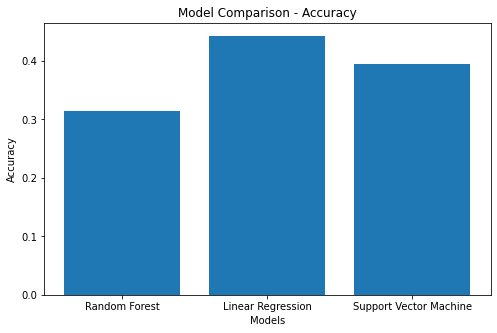

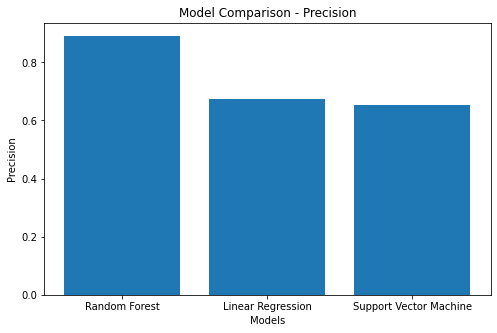

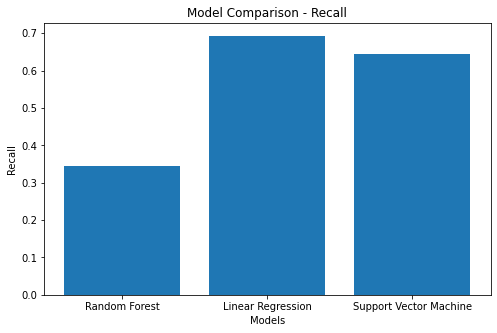

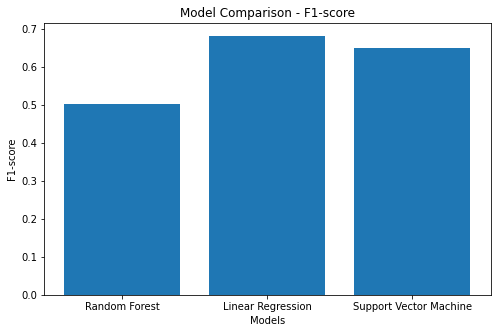

                    Model  Accuracy  Precision    Recall  F1-score
0           Random Forest  0.314266   0.890850  0.344792  0.502055
1       Linear Regression  0.442799   0.672471  0.692663  0.680958
2  Support Vector Machine  0.395020   0.652063  0.643920  0.648076


In [78]:
models = ["Random Forest", "Linear Regression", "Support Vector Machine"]
accuracy = [0.3142664872139973, 0.4427994616419919, 0.39502018842530284]
precision = [0.8908499526596717, 0.6724711873340791, 0.6520633348812913]
recall = [0.344792201128784, 0.6926629040533607, 0.6439199589533093]
f1 = [0.5020545386626821, 0.6809583858764188, 0.6480764265427317]

results_df = pd.DataFrame({"Model": models, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1})

metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
for metric in metrics:
    plt.figure(figsize=(8, 5))
    plt.bar(models, results_df[metric])
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.title(f'Model Comparison - {metric}')
    plt.show()

print(results_df)